In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.7 MB/s eta 0:00:00


In [ ]:
import numpy as np

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error (SMAPE) 계산 함수
    y_true: 실제 값 (list, numpy array)
    y_pred: 예측 값 (list, numpy array)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2

    # 분모가 0인 경우를 대비해 처리
    mask = denominator != 0
    smape_val = (100 * np.mean(numerator[mask] / denominator[mask]))

    return smape_val

# 예시
y_true = [100, 200, 300, 0]
y_pred = [110, 190, 310, 0]

print("SMAPE:", smape(y_true, y_pred), "%")


SMAPE: 5.976901058868272 %


In [ ]:
def smape_global(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum((np.abs(y_true) + np.abs(y_pred)) / 2)

    return 100 * numerator / denominator

print("SMAPE (전체 합 비율):", smape_global(y_true, y_pred), "%")


SMAPE (전체 합 비율): 4.958677685950414 %


/tmp/ipython-input-1265689141.py:22: RuntimeWarning: invalid value encountered in divide
  itemwise_vals = np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)


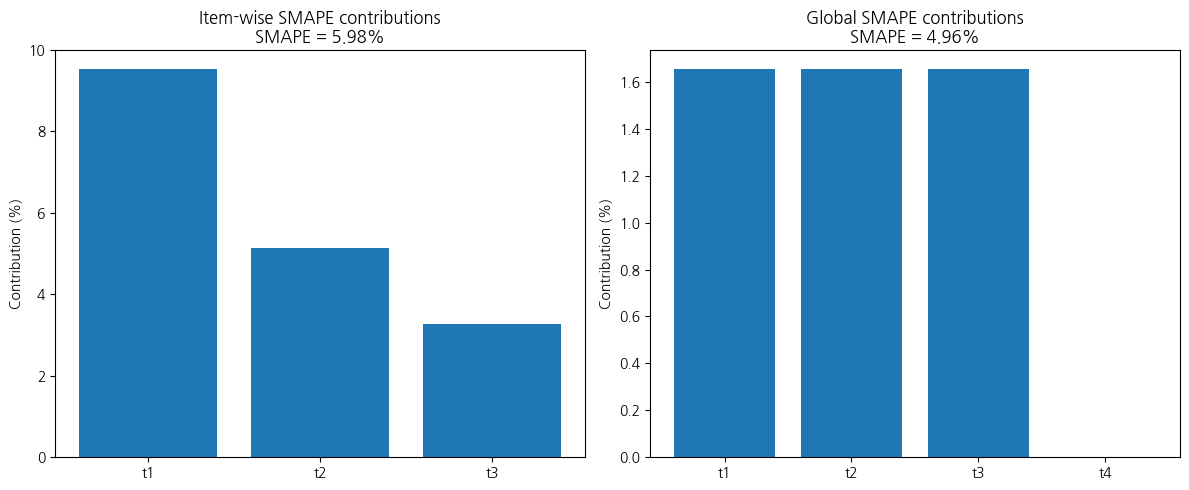

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
y_true = np.array([100, 200, 300, 0])
y_pred = np.array([110, 190, 310, 0])
labels = ["t1", "t2", "t3", "t4"]

# SMAPE 계산 함수
def smape_itemwise(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denominator != 0
    return 100 * np.mean(numerator[mask] / denominator[mask])

def smape_global(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum((np.abs(y_true) + np.abs(y_pred)) / 2)
    return 100 * numerator / denominator

# 값 계산
itemwise_vals = np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
global_vals = np.abs(y_true - y_pred)
denoms = (np.abs(y_true) + np.abs(y_pred)) / 2

smape_itemwise_val = smape_itemwise(y_true, y_pred)
smape_global_val = smape_global(y_true, y_pred)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 항목별 비율 (itemwise)
ax[0].bar(labels, itemwise_vals * 100)
ax[0].set_title(f"Item-wise SMAPE contributions\nSMAPE = {smape_itemwise_val:.2f}%")
ax[0].set_ylabel("Contribution (%)")

# Global 비율 (전체 오차/전체 규모)
contributions = (global_vals / denoms.sum()) * 100  # 전체에서 각 포인트가 차지하는 비율
ax[1].bar(labels, contributions)
ax[1].set_title(f"Global SMAPE contributions\nSMAPE = {smape_global_val:.2f}%")
ax[1].set_ylabel("Contribution (%)")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
product = pd.read_csv("/content/drive/MyDrive/최종 프로젝트/product_info.csv")

In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/최종 프로젝트/sample_submission.csv")

In [ ]:
product

,product_name,product_feature,category_level_1,category_level_2,category_level_3
0,덴마크 하이그릭요거트 400g,"이중 유청분리 공범, 꾸덕한 질감, 고소함, 호상(떠먹는) 발효유, 고단백, 아연,...",우유류,발효유,호상-중대용량
1,동원맛참 고소참기름 135g,"광고모델: 안유진, 참기름, 단백질, 셀레늄, 고소",참치,참치캔,라이트스탠다드참치
2,동원맛참 고소참기름 90g,"광고모델: 안유진, 참기름, 단백질, 셀레늄, 고소",참치,참치캔,라이트스탠다드참치
3,동원맛참 매콤참기름 135g,"광고모델: 안유진, 참기름, 단백질, 셀레늄, 매콤",참치,참치캔,라이트스탠다드참치
4,동원맛참 매콤참기름 90g,"광고모델: 안유진, 참기름, 단백질, 셀레늄, 매콤",참치,참치캔,라이트스탠다드참치
5,동원참치액 순 500g,"훈연참치추출물 80%, 참기엑기스, 참치명가, 직접 잡은 참치, 가쓰오엑기스, 표고...",조미소스,조미료,액상조미료
6,동원참치액 순 900g,"훈연참치추출물 80%, 참기엑기스, 참치명가, 직접 잡은 참치, 가쓰오엑기스, 표고...",조미소스,조미료,액상조미료
7,동원참치액 진 500g,"훈연참치추출물 80%, 참기엑기스, 참치명가, 직접 잡은 참치, 가쓰오엑기스, 표고...",조미소스,조미료,액상조미료
8,동원참치액 진 900g,"훈연참치추출물 80%, 참기엑기스, 참치명가, 직접 잡은 참치, 가쓰오엑기스, 표고...",조미소스,조미료,액상조미료
9,리챔 오믈레햄 200g,"오믈렛(Omelet)과 햄(Ham)의 합성어, 저나트륨, 내열성 케첩 소스",축산캔,고급축산캔,가미축산캔


In [ ]:
sample

,product_name,months_since_launch_1,months_since_launch_2,months_since_launch_3,months_since_launch_4,months_since_launch_5,months_since_launch_6,months_since_launch_7,months_since_launch_8,months_since_launch_9,months_since_launch_10,months_since_launch_11,months_since_launch_12
0,덴마크 하이그릭요거트 400g,0,0,0,0,0,0,0,0,0,0,0,0
1,동원맛참 고소참기름 135g,0,0,0,0,0,0,0,0,0,0,0,0
2,동원맛참 고소참기름 90g,0,0,0,0,0,0,0,0,0,0,0,0
3,동원맛참 매콤참기름 135g,0,0,0,0,0,0,0,0,0,0,0,0
4,동원맛참 매콤참기름 90g,0,0,0,0,0,0,0,0,0,0,0,0
5,동원참치액 순 500g,0,0,0,0,0,0,0,0,0,0,0,0
6,동원참치액 순 900g,0,0,0,0,0,0,0,0,0,0,0,0
7,동원참치액 진 500g,0,0,0,0,0,0,0,0,0,0,0,0
8,동원참치액 진 900g,0,0,0,0,0,0,0,0,0,0,0,0
9,리챔 오믈레햄 200g,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 28.1 MB/s eta 0:00:00


In [ ]:
pip install beautifulsoup4

In [ ]:
pip install webdriver_manager

In [ ]:
import pandas as pd
import os
import re

# 현재 디렉토리에서 _reviews.csv로 끝나는 파일들 찾기
csv_files = [f for f in os.listdir(".") if f.endswith("_reviews.csv")]

# 파일명을 변수명으로 변환하는 함수
def filename_to_varname(filename):
    """파일명을 파이썬 변수명으로 변환"""
    # .csv 제거
    name = filename.replace("_reviews.csv", "")
    # 한글과 특수문자를 언더스코어로 변환
    name = re.sub(r'[^\w]', '_', name)
    # 숫자로 시작하면 앞에 df_ 추가
    if name[0].isdigit():
        name = "df_" + name
    # 연속된 언더스코어 제거
    name = re.sub(r'_+', '_', name)
    # 앞뒤 언더스코어 제거
    name = name.strip('_')
    return name

# 데이터프레임 딕셔너리와 배열 생성
dataframes = {}
df_list = []  # 순서대로 저장할 배열

print("CSV 파일들을 로딩중...")
print("=" * 50)

for csv_file in csv_files:
    try:
        # 변수명 생성
        var_name = filename_to_varname(csv_file)

        # CSV 파일 읽기
        df = pd.read_csv(csv_file, encoding='utf-8-sig')

        # 딕셔너리에 저장
        dataframes[var_name] = df

        # 배열에도 저장 (인덱스로 접근할 수 있도록)
        df_list.append({
            'filename': csv_file,
            'var_name': var_name,
            'dataframe': df
        })

        # 전역 변수로도 등록 (선택사항)
        globals()[var_name] = df

        print(f"✅ [{len(df_list)}] {csv_file}")
        print(f"   변수명: {var_name}")
        print(f"   행 수: {len(df)}")
        print(f"   열 수: {len(df.columns)}")
        print()

    except Exception as e:
        print(f"❌ {csv_file} 로딩 실패: {e}")
        print()

print("=" * 50)
print(f"총 {len(dataframes)}개의 CSV 파일이 로딩되었습니다.")

# 로딩된 파일 목록 출력 (인덱스와 함께)
print("\n📋 로딩된 파일 목록:")
for i, item in enumerate(df_list):
    df = item['dataframe']
    print(f"  [{i+1}] {item['filename']} (변수: {item['var_name']}, 행수: {len(df)})")

# 사용 예시
print("\n💡 사용 방법:")
print("  [데이터셋번호] [샘플개수] 입력 (예: 1 5)")
print("  0 입력시 파일 목록 다시 보기")
print("  'exit' 입력시 종료")

# 사용자 입력 대기 및 처리
def show_sample():
    """사용자 입력을 받아 샘플 데이터를 보여주는 함수"""
    while True:
        try:
            user_input = input("\n🔍 입력 > ").strip()

            if user_input.lower() == 'exit':
                print("👋 프로그램을 종료합니다.")
                break

            # 0 입력시 리스트 다시 보여주기
            if user_input == '0':
                print("\n📋 로딩된 파일 목록:")
                for i, item in enumerate(df_list):
                    df = item['dataframe']
                    print(f"  [{i+1}] {item['filename']} (변수: {item['var_name']}, 행수: {len(df)})")
                continue

            # 입력 파싱
            parts = user_input.split()
            if len(parts) != 2:
                print("❌ 형식: [데이터셋번호] [샘플개수] (예: 1 5)")
                print("   0 입력시 파일 목록 다시 보기")
                continue

            df_index = int(parts[0]) - 1  # 0-based 인덱스로 변환
            sample_count = int(parts[1])

            # 유효성 검사
            if df_index < 0 or df_index >= len(df_list):
                print(f"❌ 데이터셋 번호는 1부터 {len(df_list)}까지 입력해주세요.")
                continue

            if sample_count <= 0:
                print("❌ 샘플 개수는 1 이상이어야 합니다.")
                continue

            # 데이터프레임 가져오기
            selected_df = df_list[df_index]['dataframe']
            filename = df_list[df_index]['filename']

            # 샘플 개수 조정 (데이터보다 많이 요청한 경우)
            actual_sample_count = min(sample_count, len(selected_df))

            print(f"\n📊 [{df_index+1}] {filename}")
            print(f"📝 요청: {sample_count}개, 실제: {actual_sample_count}개 샘플")
            print("-" * 80)

            # 랜덤 샘플 표시
            sample_df = selected_df.sample(n=actual_sample_count) if len(selected_df) > actual_sample_count else selected_df

            # 데이터 출력 (보기 좋게)
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', None)
            pd.set_option('display.max_colwidth', 50)

            print(sample_df.to_string(index=False))
            print("-" * 80)
            print(f"💡 전체 데이터 정보: {len(selected_df)}행, {len(selected_df.columns)}열")

        except ValueError:
            print("❌ 숫자를 올바르게 입력해주세요. (예: 1 5)")
        except KeyboardInterrupt:
            print("\n👋 프로그램을 종료합니다.")
            break
        except Exception as e:
            print(f"❌ 오류 발생: {e}")

# 함수 호출
if df_list:
    show_sample()
else:
    print("❌ 로딩된 CSV 파일이 없습니다.")

CSV 파일들을 로딩중...
총 0개의 CSV 파일이 로딩되었습니다.

📋 로딩된 파일 목록:

💡 사용 방법:
  [데이터셋번호] [샘플개수] 입력 (예: 1 5)
  0 입력시 파일 목록 다시 보기
  'exit' 입력시 종료
❌ 로딩된 CSV 파일이 없습니다.


In [ ]:
('/content/drive/MyDrive/최종 프로젝트/동원 리챔 오믈레햄 200G_3_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 맛참 매콤참치 135G_4_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 맛참 참치 매콤 90G_4_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 맛참참치 고소 135G_4.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 맛참참치 고소 90G_4_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 참치액순 500G_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 참치액순 900G_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 참치액진 500G_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 참치액진 900G_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 프리미엄 참치액 500G_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원 프리미엄 참치액 900G_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/동원덴마크 하이그릭요거트 400G_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/소화가 잘되는 우유로 만든 바닐라라떼 250mL_reviews.csv')
('/content/drive/MyDrive/최종 프로젝트/소화가 잘되는 우유로 만든 카페라떼 250mL_reviews.csv')

'/content/drive/MyDrive/최종 프로젝트/소화가 잘되는 우유로 만든 카페라떼 250mL_reviews.csv'

# 여기 보세요(키워드 분석 파트)

In [ ]:
import pandas as pd
from konlpy.tag import Komoran
import os

komoran = Komoran()

# ✨ 해결: Komoran 분석기의 결과(어간/기본형)에 맞춰 키워드 사전을 전체적으로 업데이트했습니다.
keyword_dict = {
    '가격': [
        '가격', '가성비', '저렴', '세일', '행사', '비싸다', '할인', '금액',
        '싸다', '특가', '이벤트', '쿠폰', '원쁠원', '플러스원'
    ],
    '맛': [
        '맛', '맛있', '짜다', '달다', '맵다', '고소', '담백', '느끼',
        '입맛', '싱겁다', '풍미', '새콤', '달콤', '매콤', '짭짤',
        '감칠맛', '밍밍', '자극적', '맛나다', '꾸덕'
    ],
    '포장': [
        '포장', '꼼꼼', '안전', '파손', '찌그러지다', '터지다', '새다', '깔끔',
        '문제없이'
    ],
    '배송': [
        '배송', '빠르다', '느리다', '배달', '도착', '빨리', '신속', '총알', '늦다',
        '지연'
    ],
    '재구매': [
        '재구매', '또', '자주', '항상', '쟁이다', '애용', '정착'
    ],
    '품질': [
        '품질', '좋', '신선', '상태', '퀄리티', '만족', '유통기한',
        '기한'
    ],
    '편의성': [
        '간편', '편하다', '편리', '활용도',
        '간단', '손쉽다', '여기저기', '만능'
    ],
    '건강': [
        '건강', '단백질', '영양', '성분', '나트륨', '소화', '칼로리', '당',
        '첨가물', '부담', '덜', '몸'
    ]
}

def extract_keywords(review):
    """리뷰 텍스트에서 키워드를 추출하는 함수"""
    if not isinstance(review, str):
        return []

    tokens = [word for word, pos in komoran.pos(review) if pos.startswith('N') or pos.startswith('V') or pos.startswith('VA')]

    found_keywords = set()
    for category, keywords in keyword_dict.items():
        if any(keyword in tokens for keyword in keywords):
            found_keywords.add(category)

    return list(found_keywords) if found_keywords else ['기타']

# 분석하고 싶은 파일 경로 전체를 넣어주세요.
file_paths = [
'/content/drive/MyDrive/최종 프로젝트/동원 리챔 오믈레햄 200G_3_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 맛참 매콤참치 135G_4_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 맛참 참치 매콤 90G_4_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 맛참참치 고소 135G_4.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 맛참참치 고소 90G_4_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 참치액순 500G_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 참치액순 900G_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 참치액진 500G_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 참치액진 900G_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 프리미엄 참치액 500G_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원 프리미엄 참치액 900G_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/동원덴마크 하이그릭요거트 400G_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/소화가 잘되는 우유로 만든 바닐라라떼 250mL_reviews.csv',
'/content/drive/MyDrive/최종 프로젝트/소화가 잘되는 우유로 만든 카페라떼 250mL_reviews.csv'
]

# (파일 처리 부분은 이전과 동일합니다)
for file_path in file_paths:
    try:
        try:
            df = pd.read_csv(file_path, encoding='utf-8', dtype=str)
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='cp949', dtype=str)

        review_col = '리뷰내용'
        if review_col not in df.columns:
             print(f"'{file_path}' 파일에 '리뷰내용' 열이 없습니다.")
             continue

        df['키워드'] = df[review_col].apply(extract_keywords)

        output_filename = f"keywords_{os.path.basename(file_path)}"
        df.to_csv(output_filename, index=False, encoding='utf-8-sig')

        print(f"✅ '{file_path}' 파일 처리 완료! 결과가 '{output_filename}'에 저장되었습니다.")

    except FileNotFoundError:
        print(f"❗️ 파일을 찾을 수 없습니다: '{file_path}'")
    except Exception as e:
        print(f"❗️ '{file_path}' 파일을 처리하는 중 오류가 발생했습니다: {e}")

✅ '/content/drive/MyDrive/최종 프로젝트/동원 리챔 오믈레햄 200G_3_reviews.csv' 파일 처리 완료! 결과가 'keywords_동원 리챔 오믈레햄 200G_3_reviews.csv'에 저장되었습니다.
✅ '/content/drive/MyDrive/최종 프로젝트/동원 맛참 매콤참치 135G_4_reviews.csv' 파일 처리 완료! 결과가 'keywords_동원 맛참 매콤참치 135G_4_reviews.csv'에 저장되었습니다.
✅ '/content/drive/MyDrive/최종 프로젝트/동원 맛참 참치 매콤 90G_4_reviews.csv' 파일 처리 완료! 결과가 'keywords_동원 맛참 참치 매콤 90G_4_reviews.csv'에 저장되었습니다.
✅ '/content/drive/MyDrive/최종 프로젝트/동원 맛참참치 고소 135G_4.csv' 파일 처리 완료! 결과가 'keywords_동원 맛참참치 고소 135G_4.csv'에 저장되었습니다.
✅ '/content/drive/MyDrive/최종 프로젝트/동원 맛참참치 고소 90G_4_reviews.csv' 파일 처리 완료! 결과가 'keywords_동원 맛참참치 고소 90G_4_reviews.csv'에 저장되었습니다.
✅ '/content/drive/MyDrive/최종 프로젝트/동원 참치액순 500G_reviews.csv' 파일 처리 완료! 결과가 'keywords_동원 참치액순 500G_reviews.csv'에 저장되었습니다.
✅ '/content/drive/MyDrive/최종 프로젝트/도

🔧 1단계: 한글 폰트 설치 및 캐시 삭제를 시작합니다...
✅ 폰트 설치가 완료되었습니다.



🔄 2단계: 전체 데이터 처리 및 그래프 생성을 시작합니다...
✅ 전체 키워드 빈도수 그래프가 'keyword_frequency_total_percent.png' 파일로 저장되었습니다.


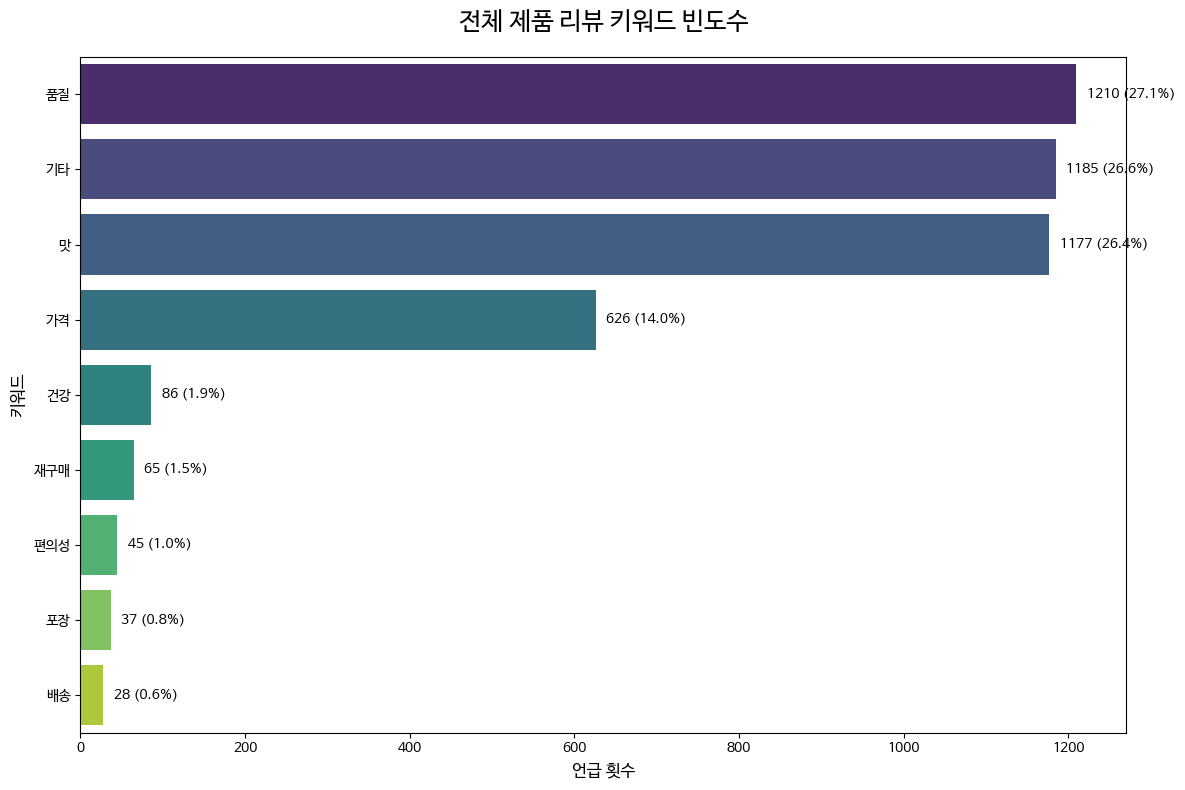

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import matplotlib
from IPython.display import display, HTML

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 1단계: 폰트 설치 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
print("🔧 1단계: 한글 폰트 설치 및 캐시 삭제를 시작합니다...")
!apt-get -qq -y install fonts-nanum
!rm -rf {matplotlib.get_cachedir()}/*
print("✅ 폰트 설치가 완료되었습니다.")


# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ ‼️ 중요: 사용자 안내 메시지 ‼️ ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

display(HTML("<h2 style='color:red;'>‼️ 중요: 만약 이 셀을 처음 실행하셨다면, 지금 바로 상단 메뉴에서 [세션] > [세션 다시 시작]을 누른 후, 이 셀을 다시 실행해주세요.</h2>"))
display(HTML("<p>세션을 다시 시작하지 않으면 아래 그래프의 한글이 깨져 보일 수 있습니다.</p>"))


# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 2단계: 전체 데이터 처리 및 그래프 생성 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
print("\n🔄 2단계: 전체 데이터 처리 및 그래프 생성을 시작합니다...")

keyword_files = [f for f in os.listdir('.') if f.startswith('keywords_') and f.endswith('.csv')]

if not keyword_files:
    print("분석할 'keywords_'로 시작하는 결과 파일이 없습니다.")
else:
    all_df_list = []
    for file in keyword_files:
        try:
            df = pd.read_csv(file)
            all_df_list.append(df)
        except Exception as e:
            print(f"파일 읽기 오류: {e}")

    if all_df_list:
        combined_df = pd.concat(all_df_list, ignore_index=True)

        if '키워드' in combined_df.columns:
            combined_df['키워드_리스트'] = combined_df['키워드'].apply(ast.literal_eval)
            keywords_series = combined_df['키워드_리스트'].explode()
            keyword_counts = keywords_series.value_counts()
            keyword_counts_df = keyword_counts.reset_index()
            keyword_counts_df.columns = ['키워드', '빈도수']

            # --- 시각화 (수정된 부분) ---
            # 1. 전체 키워드 언급 횟수 계산
            total_count = keyword_counts_df['빈도수'].sum()

            plt.figure(figsize=(12, 8))
            # 2. FutureWarning 해결 및 hue='키워드'로 각 막대 색상 유지
            barplot = sns.barplot(x='빈도수', y='키워드', data=keyword_counts_df, palette='viridis', hue='키워드', legend=False)
            plt.title('전체 제품 리뷰 키워드 빈도수', fontsize=18, pad=20)
            plt.xlabel('언급 횟수', fontsize=12)
            plt.ylabel('키워드', fontsize=12)

            # 3. AttributeError 해결 및 백분율(%) 텍스트 표시
            for p in barplot.patches:
                count = p.get_width()
                if total_count > 0:
                    percentage = (count / total_count) * 100
                    label = f'{int(count)} ({percentage:.1f}%)'
                else:
                    label = f'{int(count)} (0.0%)'

                plt.text(count + (plt.xlim()[1] * 0.01),
                         p.get_y() + p.get_height() / 2,
                         label,
                         ha='left',
                         va='center')

            plt.tight_layout()
            output_filename = 'keyword_frequency_total_percent.png' # 파일 이름 변경
            plt.savefig(output_filename)

            print(f"✅ 전체 키워드 빈도수 그래프가 '{output_filename}' 파일로 저장되었습니다.")
        else:
            print("오류: '키워드' 열을 찾을 수 없습니다.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import matplotlib
from IPython.display import display, HTML

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 1단계: 폰트 설치 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
print("🔧 1단계: 한글 폰트 설치 및 캐시 삭제를 시작합니다...")
!apt-get -qq -y install fonts-nanum
!rm -rf {matplotlib.get_cachedir()}/*
print("✅ 폰트 설치가 완료되었습니다.")


# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ ‼️ 중요: 사용자 안내 메시지 ‼️ ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

display(HTML("<h2 style='color:red;'>‼️ 중요: 만약 이 셀을 처음 실행하셨다면, 지금 바로 상단 메뉴에서 [세션] > [세션 다시 시작]을 누른 후, 이 셀을 다시 실행해주세요.</h2>"))
display(HTML("<p>세션을 다시 시작하지 않으면 아래 그래프의 한글이 깨져 보일 수 있습니다.</p>"))


# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 2단계: 카테고리별 데이터 처리 및 시각화 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
print("\n🔄 2단계: 카테고리별 데이터 처리 및 그래프 생성을 시작합니다...")

# --- 제품 카테고리 정의 ---
product_categories = {
    "유제품": [
'/content/keywords_동원덴마크 하이그릭요거트 400G_reviews.csv'
    ],
    "RTD 커피": [
'/content/keywords_소화가 잘되는 우유로 만든 바닐라라떼 250mL_reviews.csv',
'/content/keywords_소화가 잘되는 우유로 만든 카페라떼 250mL_reviews.csv'
    ],
    "통조림(참치)": [
'/content/keywords_동원 맛참 매콤참치 135G_4_reviews.csv',
'/content/keywords_동원 맛참 참치 매콤 90G_4_reviews.csv',
'/content/keywords_동원 맛참참치 고소 135G_4.csv',
'/content/keywords_동원 맛참참치 고소 90G_4_reviews.csv'
    ],
    "통조림(햄)": [
        '/content/keywords_동원 리챔 오믈레햄 200G_3_reviews.csv'
    ],
    "조미액젓류(참치액:순,진)": [
'/content/keywords_동원 참치액순 500G_reviews.csv',
'/content/keywords_동원 참치액순 900G_reviews.csv',
'/content/keywords_동원 참치액진 500G_reviews.csv',
'/content/keywords_동원 참치액진 900G_reviews.csv',
    ],
    "조미액젓류(참치액:프리미엄)": [
'/content/keywords_동원 프리미엄 참치액 500G_reviews.csv',
'/content/keywords_동원 프리미엄 참치액 900G_reviews.csv'
    ],
    "조미액젓류(참치액:통합)": [
'/content/keywords_동원 참치액순 500G_reviews.csv',
'/content/keywords_동원 참치액순 900G_reviews.csv',
'/content/keywords_동원 참치액진 500G_reviews.csv',
'/content/keywords_동원 참치액진 900G_reviews.csv',
'/content/keywords_동원 프리미엄 참치액 500G_reviews.csv',
'/content/keywords_동원 프리미엄 참치액 900G_reviews.csv'
    ]
}

# --- 카테고리별로 순회하며 시각화 ---
for category_name, file_list in product_categories.items():

    category_df_list = []
    print(f"\n===== '{category_name}' 카테고리 처리 중... =====")

    for file in file_list:
        try:
            df = pd.read_csv(file)
            if '키워드' in df.columns:
                category_df_list.append(df)
            else:
                print(f"⚠️ 경고: '{file}' 파일에 '키워드' 열이 없습니다. 건너뜁니다.")
        except FileNotFoundError:
            print(f"❗️ 오류: '{file}' 파일을 찾을 수 없습니다. 건너뜁니다.")
            continue

    if not category_df_list:
        print(f"'{category_name}' 카테고리에 처리할 데이터가 없습니다.")
        continue

    combined_df = pd.concat(category_df_list, ignore_index=True)
    combined_df['키워드_리스트'] = combined_df['키워드'].apply(ast.literal_eval)
    keywords_series = combined_df['키워드_리스트'].explode()
    keyword_counts = keywords_series.value_counts().reset_index()
    keyword_counts.columns = ['키워드', '빈도수']

    total_count = keyword_counts['빈도수'].sum()

    plt.figure(figsize=(12, 8))
    # FutureWarning 경고 메시지 해결을 위해 hue='키워드', legend=False 추가
    barplot = sns.barplot(x='빈도수', y='키워드', data=keyword_counts, palette='plasma', hue='키워드', legend=False)
    plt.title(f"'{category_name}' 카테고리 리뷰 키워드 빈도수", fontsize=18, pad=20)
    plt.xlabel('언급 횟수', fontsize=12)
    plt.ylabel('키워드', fontsize=12)

    # ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ AttributeError 해결된 부분 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    # 막대 끝에 텍스트를 표시하는 올바른 방식입니다.
    for p in barplot.patches:
        count = p.get_width()
        if total_count > 0:
            percentage = (count / total_count) * 100
            label = f'{int(count)} ({percentage:.1f}%)'
        else:
            label = f'{int(count)} (0.0%)'

        # 잘못된 xytext 옵션을 제거하고, x좌표에 작은 값을 더해 위치를 조정합니다.
        plt.text(count + (plt.xlim()[1] * 0.01), # x좌표 (막대 길이 + 약간의 여백)
                 p.get_y() + p.get_height() / 2, # y좌표 (막대의 중간 높이)
                 label,                          # 표시할 텍스트
                 ha='left',                      # 수평 정렬 (왼쪽)
                 va='center')                    # 수직 정렬 (중간)
    # ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

    plt.tight_layout()
    output_filename = f"keyword_frequency_{category_name}_percent.png"
    plt.savefig(output_filename)
    plt.close()

    print(f"✅ '{category_name}' 카테고리 그래프가 '{output_filename}' 파일로 저장되었습니다.")

🔧 1단계: 한글 폰트 설치 및 캐시 삭제를 시작합니다...
✅ 폰트 설치가 완료되었습니다.



🔄 2단계: 카테고리별 데이터 처리 및 그래프 생성을 시작합니다...

===== '유제품' 카테고리 처리 중... =====
✅ '유제품' 카테고리 그래프가 'keyword_frequency_유제품_percent.png' 파일로 저장되었습니다.

===== 'RTD 커피' 카테고리 처리 중... =====
✅ 'RTD 커피' 카테고리 그래프가 'keyword_frequency_RTD 커피_percent.png' 파일로 저장되었습니다.

===== '통조림(참치)' 카테고리 처리 중... =====
✅ '통조림(참치)' 카테고리 그래프가 'keyword_frequency_통조림(참치)_percent.png' 파일로 저장되었습니다.

===== '통조림(햄)' 카테고리 처리 중... =====
✅ '통조림(햄)' 카테고리 그래프가 'keyword_frequency_통조림(햄)_percent.png' 파일로 저장되었습니다.

===== '조미액젓류(참치액:순,진)' 카테고리 처리 중... =====
✅ '조미액젓류(참치액:순,진)' 카테고리 그래프가 'keyword_frequency_조미액젓류(참치액:순,진)_percent.png' 파일로 저장되었습니다.

===== '조미액젓류(참치액:프리미엄)' 카테고리 처리 중... =====
✅ '조미액젓류(참치액:프리미엄)' 카테고리 그래프가 'keyword_frequency_조미액젓류(참치액:프리미엄)_percent.png' 파일로 저장되었습니다.

===== '조미액젓류(참치액:통합)' 카테고리 처리 중... =====
✅ '조미액젓류(참치액:통합)' 카테고리 그래프가 'keyword_frequency_조미액젓류(참치액:통합)_percent.png' 파일로 저장되었습니다.


In [ ]:
product_categories = {
    "유제품": [
'/content/keywords_동원덴마크 하이그릭요거트 400G_reviews.csv'
    ],
    "RTD 커피": [
'/content/keywords_소화가 잘되는 우유로 만든 바닐라라떼 250mL_reviews.csv',
'/content/keywords_소화가 잘되는 우유로 만든 카페라떼 250mL_reviews.csv'
    ],
    "통조림(참치)": [
'/content/keywords_동원 맛참 매콤참치 135G_4_reviews.csv',
'/content/keywords_동원 맛참 참치 매콤 90G_4_reviews.csv',
'/content/keywords_동원 맛참참치 고소 135G_4.csv',
'/content/keywords_동원 맛참참치 고소 90G_4_reviews.csv'
    ],
    "통조림(햄)": [
        '/content/keywords_동원 리챔 오믈레햄 200G_3_reviews.csv'
    ],
    "조미액젓류(참치액:순,진)": [
'/content/keywords_동원 참치액순 500G_reviews.csv',
'/content/keywords_동원 참치액순 900G_reviews.csv',
'/content/keywords_동원 참치액진 500G_reviews.csv',
'/content/keywords_동원 참치액진 900G_reviews.csv',
    ],
    "조미액젓류(참치액:프리미엄)": [
'/content/keywords_동원 프리미엄 참치액 500G_reviews.csv',
'/content/keywords_동원 프리미엄 참치액 900G_reviews.csv'
    ],
    "조미액젓류(참치액:통합)": [
'/content/keywords_동원 참치액순 500G_reviews.csv',
'/content/keywords_동원 참치액순 900G_reviews.csv',
'/content/keywords_동원 참치액진 500G_reviews.csv',
'/content/keywords_동원 참치액진 900G_reviews.csv',
'/content/keywords_동원 프리미엄 참치액 500G_reviews.csv',
'/content/keywords_동원 프리미엄 참치액 900G_reviews.csv'
    ]
}

In [ ]:
from konlpy.tag import Komoran

# Komoran 형태소 분석기 초기화
komoran = Komoran()

# 👇 여기에 '기타'로 나온 리뷰 내용을 붙여넣어 보세요
review_sentence = "엄청 크네요 ㅋㅋㅋ 밥에 비벼서 계란프라이 한장 올리면 끝장입니다. 진짜 개강추합니다요 완전 맛있고 단백질보충도 되고요 ㅋ	"

# 1. Komoran 형태소 분석기가 문장을 어떻게 쪼개는지 확인
tokens_with_pos = komoran.pos(review_sentence)

# 2. 키워드 비교에 사용되는 최종 단어 목록 확인
# Komoran의 품사 태그(NNG: 명사, VV: 동사, VA: 형용사 등)에 맞춰 단어를 추출합니다.
final_tokens = [word for word, pos in tokens_with_pos if pos.startswith('N') or pos.startswith('V') or pos.startswith('VA')]

print("--- Komoran 문장 분석 결과 ---")
print(f"▶ 원본 문장: {review_sentence}")
print(f"▶ 형태소 분석 결과 (단어+품사): {tokens_with_pos}")
print(f"▶ 키워드 매칭에 사용된 최종 단어: {final_tokens}")

--- Komoran 문장 분석 결과 ---
▶ 원본 문장: 엄청 크네요 ㅋㅋㅋ 밥에 비벼서 계란프라이 한장 올리면 끝장입니다. 진짜 개강추합니다요 완전 맛있고 단백질보충도 되고요 ㅋ	
▶ 형태소 분석 결과 (단어+품사): [('엄청', 'MAG'), ('크', 'VA'), ('네요', 'EC'), ('ㅋㅋㅋ', 'NA'), ('밥', 'NNG'), ('에', 'JKB'), ('비비', 'VV'), ('어서', 'EC'), ('계란', 'NNG'), ('프라이', 'NNP'), ('한장', 'NNP'), ('올리', 'VV'), ('면', 'EC'), ('끝장', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF'), ('진짜', 'MAG'), ('개강', 'NNG'), ('추하', 'VA'), ('ㅂ니다요', 'EC'), ('완전', 'NNG'), ('맛있', 'VA'), ('고', 'EC'), ('단백질', 'NNP'), ('보충', 'NNG'), ('도', 'JX'), ('되', 'VV'), ('고요', 'EC'), ('ㅋ', 'NA')]
▶ 키워드 매칭에 사용된 최종 단어: ['크', 'ㅋㅋㅋ', '밥', '비비', '계란', '프라이', '한장', '올리', '끝장', '이', '개강', '추하', '완전', '맛있', '단백질', '보충', '되', 'ㅋ']


In [ ]:
import pandas as pd

# 키워드가 저장된 결과 파일 중 하나의 이름을 지정합니다.
output_file = '/content/keywords_동원 리챔 오믈레햄 200G_3_reviews.csv'

# 파일을 읽어와서 데이터프레임으로 만듭니다.
result_df = pd.read_csv(output_file)

# '리뷰내용'과 새롭게 추가된 '키워드' 열의 상위 5개 행을 출력합니다.
print("--- 결과 확인 ---")
print(result_df[['리뷰내용', '키워드']])

--- 결과 확인 ---
                                                 리뷰내용           키워드
0                                좋은 제품입니다.\n행사가로 좋아요.  ['가격', '품질']
1                                         좋은제품 잘받았습니다        ['품질']
2                         부드럽고 햄볶음밥에 케찹을 곁들인 맛있는 맛이에요         ['맛']
3                                          so good ~~        ['기타']
4                   행사해서 사봤는데 짠맛이 덜해서 마음이 좀 편해지네요. ^^        ['가격']
5                                        아이들이 엄청 잘먹어요        ['기타']
6                                   좋은 금액에 알뜰하게 구매해요.  ['가격', '품질']
7                                  행사해서 잘산거같아요 잘쓰고있어요        ['가격']
8              기존 통조림햄보다 짜지않아요\n와 엄청 맛잇다 까진 아니지만 괜춘한듯         ['맛']
9                                   좋은상품 저렴히 잘 구매했습니다        ['품질']
10                                     새로나와서 사봣어요 맛잇길         ['맛']
11  지난번부터 궁금했는데 비싸서 망설이다가 할인해서 후딱 구매했어요 ㅎㅎ 리챔 좋아하는...   ['가격', '맛']
12                                 저렴한 가격으로 잘 구매했습니다~        ['가격']
13                              특이

# 수요량 예측 시스템

In [ ]:
import pandas as pd
import re

print("[1단계: 제품 분류 및 시뮬레이션 준비]")

try:
    # 1. 샘플 제출 파일 로드
    submission_df = pd.read_csv('/content/drive/MyDrive/최종 프로젝트/sample_submission.csv')

    # 2. 첫 번째 열의 이름을 제품 ID로 자동 인식
    id_column_name = submission_df.columns[0]
    print(f"인식된 제품 ID 열: '{id_column_name}'")

    # 3. 제품 ID를 기반으로 카테고리를 분류하는 함수
    def categorize_product(product_id):
        product_id_lower = str(product_id).lower()
        if '요거트' in product_id_lower: return '유제품'
        if '라떼' in product_id_lower or 'coffee' in product_id_lower: return 'RTD 커피'
        if 'tuna_chamchi' in product_id_lower or '맛참' in product_id_lower: return '통조림(참치)'
        if '리챔' in product_id_lower: return '통조림(햄)'
        if 'tuna_sauce' in product_id_lower or '참치액' in product_id_lower: return '조미액젓류(참치액)'
        return '기타'

    # 4. '카테고리' 열 추가
    submission_df['카테고리'] = submission_df[id_column_name].apply(categorize_product)

    # 5. 카테고리별 제품 목록 생성 및 출력
    product_lists_by_category = submission_df.groupby('카테고리')[id_column_name].apply(list).to_dict()

    print("\n--- 📝 2단계 프롬프트에 사용할 카테고리별 제품 목록 ---")
    for category, products in product_lists_by_category.items():
        print(f"\n>> {category} (총 {len(products)}개 제품)")
        product_list_str = ",\n".join([f"  - '{p}'" for p in products])
        print(f"[\n{product_list_str}\n]")

except FileNotFoundError:
    print("오류: 'sample_submission.csv' 파일을 찾을 수 없습니다. 파일을 현재 위치에 업로드해주세요.")
except Exception as e:
    print(f"코드를 실행하는 중 오류가 발생했습니다: {e}")

[1단계: 제품 분류 및 시뮬레이션 준비]
인식된 제품 ID 열: 'product_name'

--- 📝 2단계 프롬프트에 사용할 카테고리별 제품 목록 ---

>> RTD 커피 (총 2개 제품)
[
  - '소화가 잘되는 우유로 만든 바닐라라떼 250mL',
  - '소화가 잘되는 우유로 만든 카페라떼 250mL'
]

>> 유제품 (총 1개 제품)
[
  - '덴마크 하이그릭요거트 400g'
]

>> 조미액젓류(참치액) (총 6개 제품)
[
  - '동원참치액 순 500g',
  - '동원참치액 순 900g',
  - '동원참치액 진 500g',
  - '동원참치액 진 900g',
  - '프리미엄 동원참치액 500g',
  - '프리미엄 동원참치액 900g'
]

>> 통조림(참치) (총 4개 제품)
[
  - '동원맛참 고소참기름 135g',
  - '동원맛참 고소참기름 90g',
  - '동원맛참 매콤참기름 135g',
  - '동원맛참 매콤참기름 90g'
]

>> 통조림(햄) (총 2개 제품)
[
  - '리챔 오믈레햄 200g',
  - '리챔 오믈레햄 340g'
]


In [ ]:
import pandas as pd
from io import StringIO
import re

print("--- [최종 단계] 데이터 분류, 취합 및 파일 생성 시작 ---")

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼ 1. LLM 시뮬레이션 결과 (데이터베이스 역할) ▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
llm_results = {
    "조미액젓류(참치액)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 동원 참치액순 500G | 44 | 40 | 68 | 62 | 85 | 55 | 75 | 50 | 48 | 45 | 45 | 44 |
| 동원 참치액순 900G | 66 | 60 | 102 | 93 | 128 | 83 | 112 | 75 | 72 | 68 | 68 | 66 |
| 동원 참치액진 500G | 56 | 50 | 84 | 78 | 105 | 70 | 95 | 65 | 62 | 58 | 58 | 56 |
| 동원 참치액진 900G | 84 | 75 | 126 | 117 | 158 | 105 | 142 | 98 | 93 | 87 | 87 | 84 |
| 동원 프리미엄 참치액 500G | 40 | 35 | 60 | 55 | 74 | 50 | 68 | 47 | 45 | 42 | 42 | 40 |
| 동원 프리미엄 참치액 900G | 60 | 55 | 90 | 85 | 110 | 77 | 103 | 70 | 65 | 62 | 62 | 60 |
""",
    "통조림(참치)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 동원맛참 고소참기름 135g | 2380 | 2450 | 1980 | 2150 | 2800 | 2050 | 1980 | 2150 | 2250 | 2250 | 2180 | 2180 |
| 동원맛참 고소참기름 90g | 1580 | 1630 | 1320 | 1430 | 1870 | 1360 | 1320 | 1430 | 1500 | 1500 | 1450 | 1450 |
| 동원맛참 매콤참기름 135g | 1950 | 2000 | 1620 | 1750 | 2290 | 1670 | 1620 | 1750 | 1840 | 1840 | 1780 | 1780 |
| 동원맛참 매콤참기름 90g | 1300 | 1340 | 1080 | 1170 | 1530 | 1120 | 1080 | 1170 | 1230 | 1230 | 1190 | 1190 |
""",
    "통조림(햄)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 리챔 오믈레햄 200g | 1600 | 1680 | 2600 | 880 | 920 | 1400 | 2200 | 1000 | 1120 | 1120 | 1280 | 1120 |
| 리챔 오믈레햄 340g | 2400 | 2520 | 3900 | 1320 | 1380 | 2100 | 3300 | 1500 | 1680 | 1680 | 1920 | 1680 |
""",
    "RTD 커피": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 소화가 잘되는 우유로 만든 바닐라라떼 250mL | 9100 | 9450 | 7700 | 7700 | 8750 | 7000 | 5600 | 5950 | 6650 | 7000 | 8050 | 8400 |
| 소화가 잘되는 우유로 만든 카페라떼 250mL | 16900 | 17550 | 14300 | 14300 | 16250 | 13000 | 10400 | 11050 | 12350 | 13000 | 14950 | 15600 |
""",
    "유제품": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 덴마크 하이그릭요거트 400g | 9500 | 9800 | 8500 | 8800 | 12500 | 6500 | 6000 | 6200 | 9200 | 8500 | 8800 | 9000 |
"""
}

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼ 2. 데이터 처리 및 최종 파일 생성 (ID 표준화 적용) ▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================

try:
    # --- Part A: 원본 '정답지(틀)' 파일 로드 ---
    original_submission_df = pd.read_csv('/content/drive/MyDrive/최종 프로젝트/sample_submission.csv')
    id_column_name = original_submission_df.columns[0]
    month_columns = original_submission_df.columns[1:]

    # --- Part B: ID 표준화(Normalization) 함수 정의 ---
    def normalize_id(product_id):
        norm_id = str(product_id).lower()
        norm_id = re.sub(r'[\s_]', '', norm_id)
        norm_id = re.sub(r'(g|ml)', '', norm_id)
        norm_id = re.sub(r'[^a-z0-9가-힣]', '', norm_id)
        return norm_id

    # --- Part C: LLM 결과(내용물)를 표준화된 ID를 가진 데이터베이스로 만들기 ---
    all_predictions = []

    # ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 단어 순서 문제를 해결하기 위한 사전 교정 맵 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    pre_normalization_map = {
        '동원 프리미엄 참치액 500G': '프리미엄 동원참치액 500g',
        '동원 프리미엄 참치액 900G': '프리미엄 동원참치액 900g'
    }
    # ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

    for markdown_table in llm_results.values():
        data = StringIO(re.sub(r'\|-+\|', '|---|', markdown_table.strip()))
        pred_df = pd.read_csv(data, sep='|', skipinitialspace=True).iloc[:, 1:-1]

        # 사전 교정 맵을 먼저 적용
        pred_df.iloc[:, 0] = pred_df.iloc[:, 0].str.strip().replace(pre_normalization_map)
        all_predictions.append(pred_df)

    simulation_df = pd.concat(all_predictions, ignore_index=True)

    # 열 이름을 표준 형식으로 변경
    simulation_month_columns = simulation_df.columns[1:]
    column_rename_map = {sim_col: orig_col for sim_col, orig_col in zip(simulation_month_columns, month_columns)}
    simulation_df = simulation_df.rename(columns={simulation_df.columns[0]: id_column_name, **column_rename_map})

    # 시뮬레이션 데이터에 '표준 ID' 열 추가
    simulation_df['normalized_id'] = simulation_df[id_column_name].apply(normalize_id)

    # --- Part D: '정답지'에 '내용물'을 표준화된 ID를 기준으로 채워넣기 ---
    original_submission_df['normalized_id'] = original_submission_df[id_column_name].apply(normalize_id)

    simulation_to_merge = simulation_df[['normalized_id'] + list(month_columns)]
    output_df = pd.merge(original_submission_df, simulation_to_merge, on='normalized_id', how='left', suffixes=('', '_pred'))

    for col in month_columns:
        output_df[col] = output_df[f'{col}_pred'].combine_first(output_df[col])

    output_df = output_df[original_submission_df.columns.drop('normalized_id')]

    output_df = output_df.fillna(0)
    for col in month_columns:
        output_df[col] = output_df[col].astype(int)

    output_filename = 'final_submission.csv'
    output_df.to_csv(output_filename, index=False)

    print("\n" + "="*50)
    print(f"🎉 대표 표본 시뮬레이션 완료! '{output_filename}' 파일로 저장되었습니다.")
    print("\n--- 취합된 예측 결과 (상위 5개) ---")
    print(output_df.head())

except FileNotFoundError:
    print("오류: 'sample_submission.csv' 파일을 찾을 수 없습니다. 파일을 현재 위치에 업로드해주세요.")
except Exception as e:
    print(f"코드를 실행하는 중 오류가 발생했습니다: {e}")

--- [최종 단계] 데이터 분류, 취합 및 파일 생성 시작 ---

🎉 대표 표본 시뮬레이션 완료! 'final_submission.csv' 파일로 저장되었습니다.

--- 취합된 예측 결과 (상위 5개) ---
       product_name  months_since_launch_1  months_since_launch_2  \
0  덴마크 하이그릭요거트 400g                   9500                   9800   
1   동원맛참 고소참기름 135g                   2380                   2450   
2    동원맛참 고소참기름 90g                   1580                   1630   
3   동원맛참 매콤참기름 135g                   1950                   2000   
4    동원맛참 매콤참기름 90g                   1300                   1340   

   months_since_launch_3  months_since_launch_4  months_since_launch_5  \
0                   8500                   8800                  12500   
1                   1980                   2150                   2800   
2                   1320                   1430                   1870   
3                   1620                   1750                   2290   
4                   1080                   1170                   1530   

   months_since_laun

In [ ]:
import pandas as pd

print("\n--- [4단계: 최종 스케일업] ---")

try:
    final_df = pd.read_csv('final_submission.csv')
    id_column_name = final_df.columns[0]
except FileNotFoundError:
    print("오류: 'final_submission.csv' 파일을 찾을 수 없습니다. 3단계 코드를 먼저 실행해주세요.")
    exit()

# 카테고리 분류 함수
def categorize_product(product_id):
        product_id_lower = str(product_id).lower()
        if '요거트' in product_id_lower: return '유제품'
        if '라떼' in product_id_lower or 'coffee' in product_id_lower: return 'RTD 커피'
        if 'tuna_chamchi' in product_id_lower or '맛참' in product_id_lower: return '통조림(참치)'
        if '리챔' in product_id_lower: return '통조림(햄)'
        if 'tuna_sauce' in product_id_lower or '참치액' in product_id_lower: return '조미액젓류(참치액)'
        return '기타'

# 스케일업 계수 정의
scaling_factors = {
    '통조림(참치)': 2800, '통조림(햄)': 2500,
    '조미액젓류(참치액)': 1500, '유제품': 800,
    'RTD 커피': 1000, '기타': 1
}

scaled_df = final_df.copy()
for index, row in scaled_df.iterrows():
    product_id = row[id_column_name]
    category = categorize_product(product_id)
    factor = scaling_factors.get(category, 1)

    for col in scaled_df.columns:
        if col != id_column_name:
            scaled_df.loc[index, col] = int(row[col] * factor)

# 최종 결과 저장
scaled_output_filename = 'scaled_final_submission.csv'
scaled_df.to_csv(scaled_output_filename, index=False)

print(f"🎉 스케일업 완료! 최종 현실 판매량 예측 결과가 '{scaled_output_filename}' 파일로 저장되었습니다.")
print("\n--- 최종 예측 결과 (상위 5개) ---")
print(scaled_df.head())


--- [4단계: 최종 스케일업] ---
🎉 스케일업 완료! 최종 현실 판매량 예측 결과가 'scaled_final_submission.csv' 파일로 저장되었습니다.

--- 최종 예측 결과 (상위 5개) ---
       product_name  months_since_launch_1  months_since_launch_2  \
0  덴마크 하이그릭요거트 400g                7600000                7840000   
1   동원맛참 고소참기름 135g                6664000                6860000   
2    동원맛참 고소참기름 90g                4424000                4564000   
3   동원맛참 매콤참기름 135g                5460000                5600000   
4    동원맛참 매콤참기름 90g                3640000                3752000   

   months_since_launch_3  months_since_launch_4  months_since_launch_5  \
0                6800000                7040000               10000000   
1                5544000                6020000                7840000   
2                3696000                4004000                5236000   
3                4536000                4900000                6412000   
4                3024000                3276000                4284000   

   months_since_lau

# 2차 수요량 예측 시스템

In [ ]:
import pandas as pd
import re

print("[1단계: 제품 분류 및 시뮬레이션 준비]")

try:
    # 1. 샘플 제출 파일 로드
    submission_df = pd.read_csv('/content/drive/MyDrive/최종 프로젝트/sample_submission.csv')

    # 2. 첫 번째 열의 이름을 제품 ID로 자동 인식
    id_column_name = submission_df.columns[0]
    print(f"인식된 제품 ID 열: '{id_column_name}'")

    # 3. 제품 ID를 기반으로 카테고리를 분류하는 함수
    def categorize_product(product_id):
        product_id_lower = str(product_id).lower()
        if '요거트' in product_id_lower: return '유제품'
        if '라떼' in product_id_lower or 'coffee' in product_id_lower: return 'RTD 커피'
        if 'tuna_chamchi' in product_id_lower or '맛참' in product_id_lower: return '통조림(참치)'
        if '리챔' in product_id_lower: return '통조림(햄)'
        if 'tuna_sauce' in product_id_lower or '참치액' in product_id_lower: return '조미액젓류(참치액)'
        return '기타'

    # 4. '카테고리' 열 추가
    submission_df['카테고리'] = submission_df[id_column_name].apply(categorize_product)

    # 5. 카테고리별 제품 목록 생성 및 출력
    product_lists_by_category = submission_df.groupby('카테고리')[id_column_name].apply(list).to_dict()

    print("\n--- 📝 2단계 프롬프트에 사용할 카테고리별 제품 목록 ---")
    for category, products in product_lists_by_category.items():
        print(f"\n>> {category} (총 {len(products)}개 제품)")
        product_list_str = ",\n".join([f"  - '{p}'" for p in products])
        print(f"[\n{product_list_str}\n]")

except FileNotFoundError:
    print("오류: 'sample_submission.csv' 파일을 찾을 수 없습니다. 파일을 현재 위치에 업로드해주세요.")
except Exception as e:
    print(f"코드를 실행하는 중 오류가 발생했습니다: {e}")

[1단계: 제품 분류 및 시뮬레이션 준비]
인식된 제품 ID 열: 'product_name'

--- 📝 2단계 프롬프트에 사용할 카테고리별 제품 목록 ---

>> RTD 커피 (총 2개 제품)
[
  - '소화가 잘되는 우유로 만든 바닐라라떼 250mL',
  - '소화가 잘되는 우유로 만든 카페라떼 250mL'
]

>> 유제품 (총 1개 제품)
[
  - '덴마크 하이그릭요거트 400g'
]

>> 조미액젓류(참치액) (총 6개 제품)
[
  - '동원참치액 순 500g',
  - '동원참치액 순 900g',
  - '동원참치액 진 500g',
  - '동원참치액 진 900g',
  - '프리미엄 동원참치액 500g',
  - '프리미엄 동원참치액 900g'
]

>> 통조림(참치) (총 4개 제품)
[
  - '동원맛참 고소참기름 135g',
  - '동원맛참 고소참기름 90g',
  - '동원맛참 매콤참기름 135g',
  - '동원맛참 매콤참기름 90g'
]

>> 통조림(햄) (총 2개 제품)
[
  - '리챔 오믈레햄 200g',
  - '리챔 오믈레햄 340g'
]


# 3차 수요량 예측 시스템

In [ ]:
import pandas as pd
import re

print("[1단계: 제품 분류 및 시뮬레이션 준비]")

try:
    # 1. 샘플 제출 파일 로드
    submission_df = pd.read_csv('/content/drive/MyDrive/최종 프로젝트/sample_submission.csv')

    # 2. 첫 번째 열의 이름을 제품 ID로 자동 인식
    id_column_name = submission_df.columns[0]
    print(f"인식된 제품 ID 열: '{id_column_name}'")

    # 3. 제품 ID를 기반으로 카테고리를 분류하는 함수
    def categorize_product(product_id):
        product_id_lower = str(product_id).lower()
        if '요거트' in product_id_lower: return '유제품'
        if '라떼' in product_id_lower or 'coffee' in product_id_lower: return 'RTD 커피'
        if 'tuna_chamchi' in product_id_lower or '맛참' in product_id_lower: return '통조림(참치)'
        if '리챔' in product_id_lower: return '통조림(햄)'
        if 'tuna_sauce' in product_id_lower or '참치액' in product_id_lower: return '조미액젓류(참치액)'
        return '기타'

    # 4. '카테고리' 열 추가
    submission_df['카테고리'] = submission_df[id_column_name].apply(categorize_product)

    # 5. 카테고리별 제품 목록 생성 및 출력
    product_lists_by_category = submission_df.groupby('카테고리')[id_column_name].apply(list).to_dict()

    print("\n--- 📝 2단계 프롬프트에 사용할 카테고리별 제품 목록 ---")
    for category, products in product_lists_by_category.items():
        print(f"\n>> {category} (총 {len(products)}개 제품)")
        product_list_str = ",\n".join([f"  - '{p}'" for p in products])
        print(f"[\n{product_list_str}\n]")

except FileNotFoundError:
    print("오류: 'sample_submission.csv' 파일을 찾을 수 없습니다. 파일을 현재 위치에 업로드해주세요.")
except Exception as e:
    print(f"코드를 실행하는 중 오류가 발생했습니다: {e}")

[1단계: 제품 분류 및 시뮬레이션 준비]
인식된 제품 ID 열: 'product_name'

--- 📝 2단계 프롬프트에 사용할 카테고리별 제품 목록 ---

>> RTD 커피 (총 2개 제품)
[
  - '소화가 잘되는 우유로 만든 바닐라라떼 250mL',
  - '소화가 잘되는 우유로 만든 카페라떼 250mL'
]

>> 유제품 (총 1개 제품)
[
  - '덴마크 하이그릭요거트 400g'
]

>> 조미액젓류(참치액) (총 6개 제품)
[
  - '동원참치액 순 500g',
  - '동원참치액 순 900g',
  - '동원참치액 진 500g',
  - '동원참치액 진 900g',
  - '프리미엄 동원참치액 500g',
  - '프리미엄 동원참치액 900g'
]

>> 통조림(참치) (총 4개 제품)
[
  - '동원맛참 고소참기름 135g',
  - '동원맛참 고소참기름 90g',
  - '동원맛참 매콤참기름 135g',
  - '동원맛참 매콤참기름 90g'
]

>> 통조림(햄) (총 2개 제품)
[
  - '리챔 오믈레햄 200g',
  - '리챔 오믈레햄 340g'
]


In [ ]:
import pandas as pd
from io import StringIO
import re

print("--- [최종 단계] 데이터 분류, 취합 및 파일 생성 시작 ---")

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼ 1. LLM 시뮬레이션 결과 (데이터베이스 역할) ▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
llm_results = {
    "조미액젓류(참치액)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 동원참치액 순 500g | 45 | 42 | 68 | 60 | 85 | 60 | 75 | 50 | 55 | 56 | 50 | 51 |
| 동원참치액 순 900g | 68 | 63 | 102 | 90 | 128 | 88 | 113 | 75 | 78 | 79 | 75 | 76 |
| 동원참치액 진 500g | 55 | 51 | 84 | 75 | 105 | 75 | 94 | 65 | 68 | 69 | 65 | 66 |
| 동원참치액 진 900g | 83 | 77 | 126 | 114 | 160 | 110 | 142 | 98 | 99 | 100 | 95 | 96 |
| 프리미엄 동원참치액 500g | 60 | 55 | 80 | 75 | 95 | 75 | 85 | 63 | 67 | 68 | 65 | 66 |
| 프리미엄 동원참치액 900g | 60 | 55 | 90 | 85 | 110 | 80 | 100 | 70 | 74 | 75 | 70 | 71 |
""",
    "통조림(참치)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 동원맛참 고소참기름 135g | 2150 | 2200 | 2050 | 2060 | 2950 | 2100 | 2050 | 2070 | 2120 | 2130 | 2100 | 2110 |
| 동원맛참 고소참기름 90g | 1430 | 1470 | 1370 | 1380 | 1970 | 1400 | 1370 | 1380 | 1410 | 1420 | 1400 | 1410 |
| 동원맛참 매콤참기름 135g | 1760 | 1800 | 1680 | 1690 | 2420 | 1720 | 1680 | 1700 | 1740 | 1750 | 1720 | 1730 |
| 동원맛참 매콤참기름 90g | 1170 | 1200 | 1120 | 1130 | 1610 | 1150 | 1120 | 1130 | 1160 | 1160 | 1150 | 1150 |
""",
    "통조림(햄)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 리챔 오믈레햄 200g | 950 | 1050 | 7950 | 500 | 550 | 900 | 5600 | 400 | 650 | 650 | 750 | 700 |
| 리챔 오믈레햄 340g | 1750 | 1850 | 14550 | 850 | 900 | 1550 | 9800 | 650 | 1150 | 1150 | 1300 | 1200 |
""",
    "RTD 커피": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 소화가 잘되는 우유로 만든 바닐라라떼 250mL | 9500 | 9800 | 7800 | 8100 | 8800 | 7000 | 5600 | 5900 | 7400 | 7100 | 7800 | 8800 |
| 소화가 잘되는 우유로 만든 카페라떼 250mL | 17600 | 18200 | 14500 | 15000 | 16400 | 13000 | 10400 | 11000 | 13800 | 13200 | 14500 | 16300 |
""",
    "유제품": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 덴마크 하이그릭요거트 400g | 8500 | 8650 | 8750 | 8900 | 13500 | 7500 | 7650 | 7800 | 8500 | 8700 | 8950 | 9200 |
"""
}

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼ 2. 데이터 처리 및 최종 파일 생성 (ID 표준화 적용) ▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================

try:
    # --- Part A: 원본 '정답지(틀)' 파일 로드 ---
    original_submission_df = pd.read_csv('/content/drive/MyDrive/최종 프로젝트/sample_submission.csv')
    id_column_name = original_submission_df.columns[0]
    month_columns = original_submission_df.columns[1:]

    # --- Part B: ID 표준화(Normalization) 함수 정의 ---
    def normalize_id(product_id):
        norm_id = str(product_id).lower()
        norm_id = re.sub(r'[\s_]', '', norm_id)
        norm_id = re.sub(r'(g|ml)', '', norm_id)
        norm_id = re.sub(r'[^a-z0-9가-힣]', '', norm_id)
        return norm_id

    # --- Part C: LLM 결과(내용물)를 표준화된 ID를 가진 데이터베이스로 만들기 ---
    all_predictions = []

    # ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 단어 순서 문제를 해결하기 위한 사전 교정 맵 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    pre_normalization_map = {
        '동원 프리미엄 참치액 500G': '프리미엄 동원참치액 500g',
        '동원 프리미엄 참치액 900G': '프리미엄 동원참치액 900g'
    }
    # ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

    for markdown_table in llm_results.values():
        data = StringIO(re.sub(r'\|-+\|', '|---|', markdown_table.strip()))
        pred_df = pd.read_csv(data, sep='|', skipinitialspace=True).iloc[:, 1:-1]

        # 사전 교정 맵을 먼저 적용
        pred_df.iloc[:, 0] = pred_df.iloc[:, 0].str.strip().replace(pre_normalization_map)
        all_predictions.append(pred_df)

    simulation_df = pd.concat(all_predictions, ignore_index=True)

    # 열 이름을 표준 형식으로 변경
    simulation_month_columns = simulation_df.columns[1:]
    column_rename_map = {sim_col: orig_col for sim_col, orig_col in zip(simulation_month_columns, month_columns)}
    simulation_df = simulation_df.rename(columns={simulation_df.columns[0]: id_column_name, **column_rename_map})

    # 시뮬레이션 데이터에 '표준 ID' 열 추가
    simulation_df['normalized_id'] = simulation_df[id_column_name].apply(normalize_id)

    # --- Part D: '정답지'에 '내용물'을 표준화된 ID를 기준으로 채워넣기 ---
    original_submission_df['normalized_id'] = original_submission_df[id_column_name].apply(normalize_id)

    simulation_to_merge = simulation_df[['normalized_id'] + list(month_columns)]
    output_df = pd.merge(original_submission_df, simulation_to_merge, on='normalized_id', how='left', suffixes=('', '_pred'))

    for col in month_columns:
        output_df[col] = output_df[f'{col}_pred'].combine_first(output_df[col])

    output_df = output_df[original_submission_df.columns.drop('normalized_id')]

    output_df = output_df.fillna(0)
    for col in month_columns:
        output_df[col] = output_df[col].astype(int)

    output_filename = 'final_submission3.csv'
    output_df.to_csv(output_filename, index=False)

    print("\n" + "="*50)
    print(f"🎉 대표 표본 시뮬레이션 완료! '{output_filename}' 파일로 저장되었습니다.")
    print("\n--- 취합된 예측 결과 (상위 5개) ---")
    print(output_df.head())

except FileNotFoundError:
    print("오류: 'sample_submission.csv' 파일을 찾을 수 없습니다. 파일을 현재 위치에 업로드해주세요.")
except Exception as e:
    print(f"코드를 실행하는 중 오류가 발생했습니다: {e}")

--- [최종 단계] 데이터 분류, 취합 및 파일 생성 시작 ---

🎉 대표 표본 시뮬레이션 완료! 'final_submission3.csv' 파일로 저장되었습니다.

--- 취합된 예측 결과 (상위 5개) ---
       product_name  months_since_launch_1  months_since_launch_2  \
0  덴마크 하이그릭요거트 400g                   8500                   8650   
1   동원맛참 고소참기름 135g                   2150                   2200   
2    동원맛참 고소참기름 90g                   1430                   1470   
3   동원맛참 매콤참기름 135g                   1760                   1800   
4    동원맛참 매콤참기름 90g                   1170                   1200   

   months_since_launch_3  months_since_launch_4  months_since_launch_5  \
0                   8750                   8900                  13500   
1                   2050                   2060                   2950   
2                   1370                   1380                   1970   
3                   1680                   1690                   2420   
4                   1120                   1130                   1610   

   months_since_lau

In [ ]:
import pandas as pd

print("\n--- [4단계: 최종 스케일업] ---")

try:
    final_df = pd.read_csv('final_submission.csv')
    id_column_name = final_df.columns[0]
except FileNotFoundError:
    print("오류: 'final_submission.csv' 파일을 찾을 수 없습니다. 3단계 코드를 먼저 실행해주세요.")
    exit()

# 카테고리 분류 함수
def categorize_product(product_id):
        product_id_lower = str(product_id).lower()
        if '요거트' in product_id_lower: return '유제품'
        if '라떼' in product_id_lower or 'coffee' in product_id_lower: return 'RTD 커피'
        if 'tuna_chamchi' in product_id_lower or '맛참' in product_id_lower: return '통조림(참치)'
        if '리챔' in product_id_lower: return '통조림(햄)'
        if 'tuna_sauce' in product_id_lower or '참치액' in product_id_lower: return '조미액젓류(참치액)'
        return '기타'

# 스케일업 계수 정의
scaling_factors = {
    '통조림(참치)': 2400, '통조림(햄)': 2500,
    '조미액젓류(참치액)': 600, '유제품': 1000,
    'RTD 커피': 1200, '기타': 1
}

scaled_df = final_df.copy()
for index, row in scaled_df.iterrows():
    product_id = row[id_column_name]
    category = categorize_product(product_id)
    factor = scaling_factors.get(category, 1)

    for col in scaled_df.columns:
        if col != id_column_name:
            scaled_df.loc[index, col] = int(row[col] * factor)

# 최종 결과 저장
scaled_output_filename = 'scaled_final_submission3.csv'
scaled_df.to_csv(scaled_output_filename, index=False)

print(f"🎉 스케일업 완료! 최종 현실 판매량 예측 결과가 '{scaled_output_filename}' 파일로 저장되었습니다.")
print("\n--- 최종 예측 결과 (상위 5개) ---")
print(scaled_df.head())


--- [4단계: 최종 스케일업] ---
🎉 스케일업 완료! 최종 현실 판매량 예측 결과가 'scaled_final_submission3.csv' 파일로 저장되었습니다.

--- 최종 예측 결과 (상위 5개) ---
       product_name  months_since_launch_1  months_since_launch_2  \
0  덴마크 하이그릭요거트 400g                9500000                9800000   
1   동원맛참 고소참기름 135g                5712000                5880000   
2    동원맛참 고소참기름 90g                3792000                3912000   
3   동원맛참 매콤참기름 135g                4680000                4800000   
4    동원맛참 매콤참기름 90g                3120000                3216000   

   months_since_launch_3  months_since_launch_4  months_since_launch_5  \
0                8500000                8800000               12500000   
1                4752000                5160000                6720000   
2                3168000                3432000                4488000   
3                3888000                4200000                5496000   
4                2592000                2808000                3672000   

   months_since_la

# 4차 수요량 예측 시스템


--- 모델 버전별 예측치 비교 시각화 ---


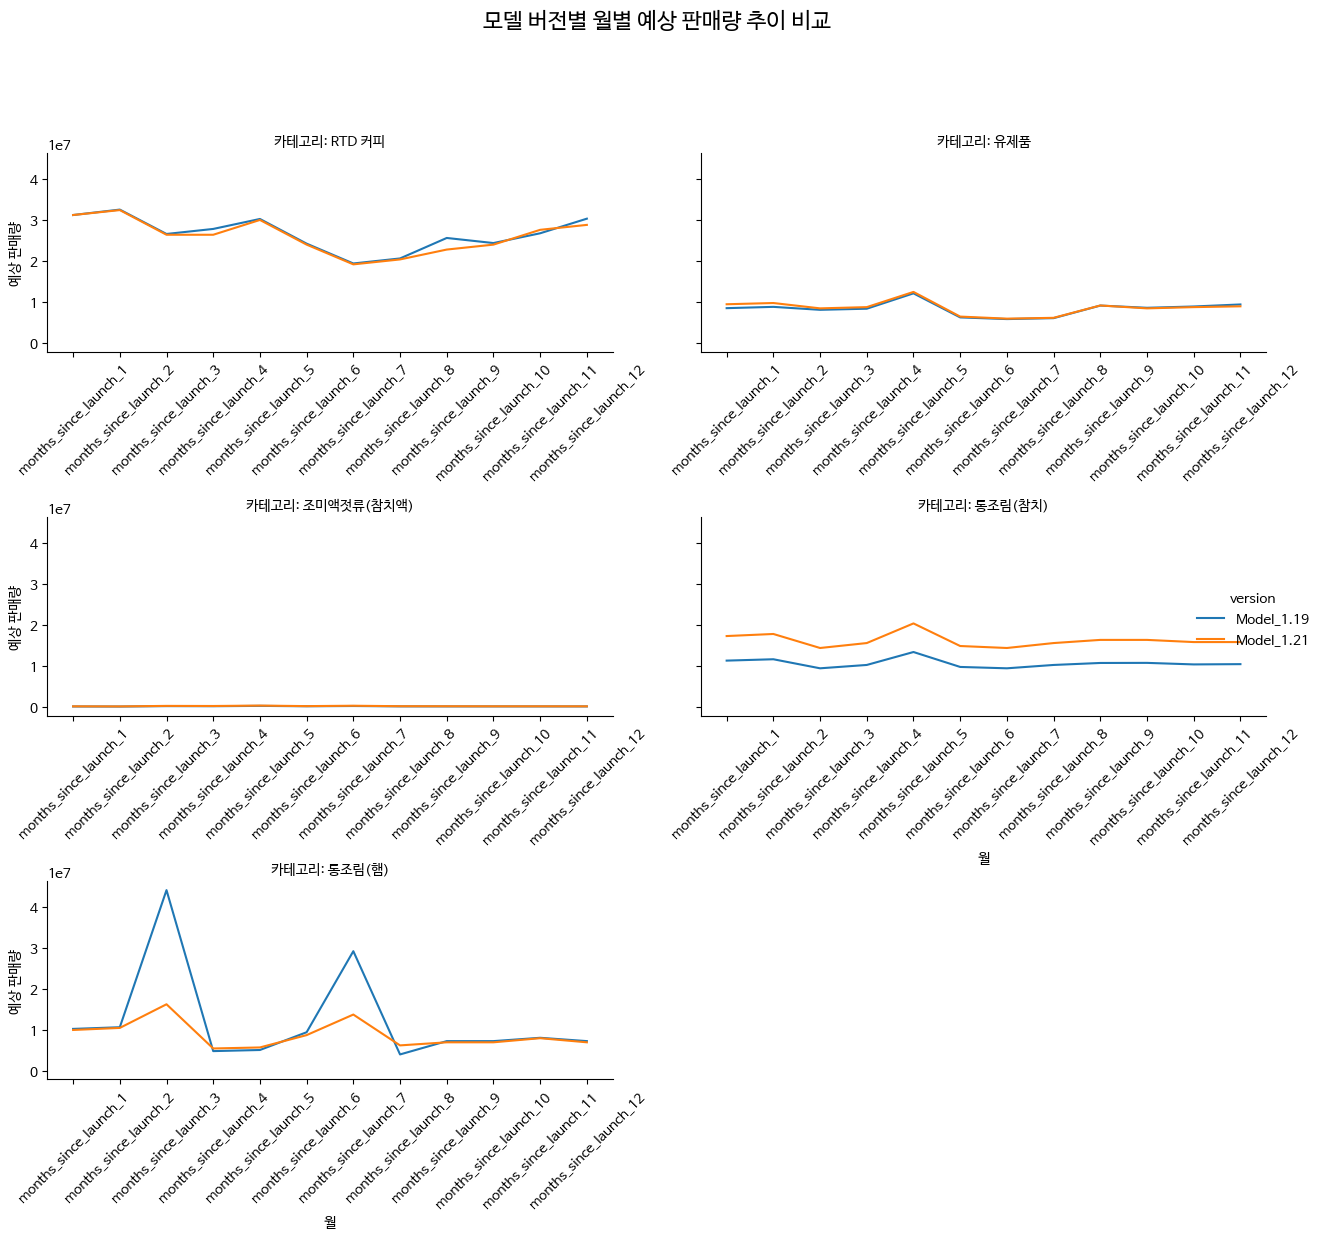


✅ 모델 비교 그래프가 'model_comparison_trends.png'으로 저장되었습니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- 폰트 설정 ---
# 이전에 폰트 설치 및 세션 재시작을 완료했다면, 이 부분은 정상적으로 작동합니다.
try:
    plt.rc('font', family='NanumBarunGothic')
    plt.rc('axes', unicode_minus=False)
except Exception as e:
    print(f"폰트 설정에 실패했습니다. 이전 폰트 설치 셀을 다시 실행하고 [세션] > [세션 다시 시작]을 진행해주세요. 오류: {e}")


# --- 비교 분석 코드 ---
try:
    # 1. 두 개의 제출 파일 로드
    df_v1 = pd.read_csv('/content/scaled_final_submission2.csv') # 1.19점 모델
    df_v2 = pd.read_csv('/content/scaled_final_submission3.csv') # 1.21점 모델

    df_v1['version'] = 'Model_1.19'
    df_v2['version'] = 'Model_1.21'

    # 2. 두 데이터프레임 결합
    combined_df = pd.concat([df_v1, df_v2], ignore_index=True)
    id_column_name = combined_df.columns[0]
    month_columns = df_v1.columns[1:-1] # 'version' 열 제외

    # 3. 카테고리 분류 함수
    def categorize_product(product_id):
        product_id_lower = str(product_id).lower()
        if '요거트' in product_id_lower: return '유제품'
        if '라떼' in product_id_lower or 'coffee' in product_id_lower: return 'RTD 커피'
        if 'tuna_chamchi' in product_id_lower or '맛참' in product_id_lower: return '통조림(참치)'
        if '리챔' in product_id_lower: return '통조림(햄)'
        if 'tuna_sauce' in product_id_lower or '참치액' in product_id_lower: return '조미액젓류(참치액)'
        return '기타'

    combined_df['카테고리'] = combined_df[id_column_name].apply(categorize_product)

    # 4. 시각화를 위해 데이터 형태 변경 및 집계
    df_long = combined_df.melt(id_vars=[id_column_name, '카테고리', 'version'], value_vars=month_columns, var_name='월', value_name='예상판매량')
    category_monthly_sales = df_long.groupby(['카테고리', '월', 'version'])['예상판매량'].sum().reset_index()

    month_order = month_columns.tolist()
    category_monthly_sales['월'] = pd.Categorical(category_monthly_sales['월'], categories=month_order, ordered=True)

    print("\n--- 모델 버전별 예측치 비교 시각화 ---")

    # 5. 카테고리별 비교 라인 그래프 생성
    g = sns.relplot(
        data=category_monthly_sales,
        x='월', y='예상판매량',
        hue='version',  # 버전에 따라 선 색상 구분
        col='카테고리',
        kind='line',
        col_wrap=2, height=4, aspect=1.5,
        facet_kws=dict(sharex=False)
    )
    g.fig.suptitle('모델 버전별 월별 예상 판매량 추이 비교', y=1.03, fontsize=16)
    g.set_xticklabels(rotation=45)
    g.set_titles("카테고리: {col_name}")
    g.set_axis_labels("월", "예상 판매량")

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    output_filename = 'model_comparison_trends.png'
    plt.savefig(output_filename)
    plt.show()

    print(f"\n✅ 모델 비교 그래프가 '{output_filename}'으로 저장되었습니다.")

except FileNotFoundError as e:
    print(f"오류: 파일명을 확인해주세요. '{e.filename}' 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

In [ ]:
pip install pytrends

🔧 1단계: 한글 폰트 설치 및 캐시 삭제를 시작합니다...
✅ 폰트 설치가 완료되었습니다.



🔄 2단계: Google 트렌드 데이터 추출 및 그래프 생성을 시작합니다...
'통조림(참치)' 카테고리 처리 중...
'통조림(햄)' 카테고리 처리 중...
'조미액젓류(참치액)' 카테고리 처리 중...
'RTD 커피' 카테고리 처리 중...
'유제품' 카테고리 처리 중...

--- [완료] 월별 검색량 데이터(패턴의 '뼈대') ---
            2024-07-31  2024-08-31  2024-09-30  2024-10-31  2024-11-30  \
통조림(참치)           64.0       210.0       248.0       338.0       275.0   
통조림(햄)            26.5       124.5       163.5       181.5       144.0   
조미액젓류(참치액)         0.0       170.0       158.0       213.0       194.0   
RTD 커피            17.0       133.0       106.0       153.5       102.5   
유제품               64.0       257.0       252.0       300.0       238.0   

            2024-12-31  2025-01-31  2025-02-28  2025-03-31  2025-04-30  \
통조림(참치)          229.0       350.0       329.0       328.0       315.0   
통조림(햄)           144.0       195.5       150.0       138.0       210.5   
조미액젓류(참치액)       208.0       286.0       253.0       238.0       269.0   
RTD 커피            59.5       164.0        85.5       101.0       14

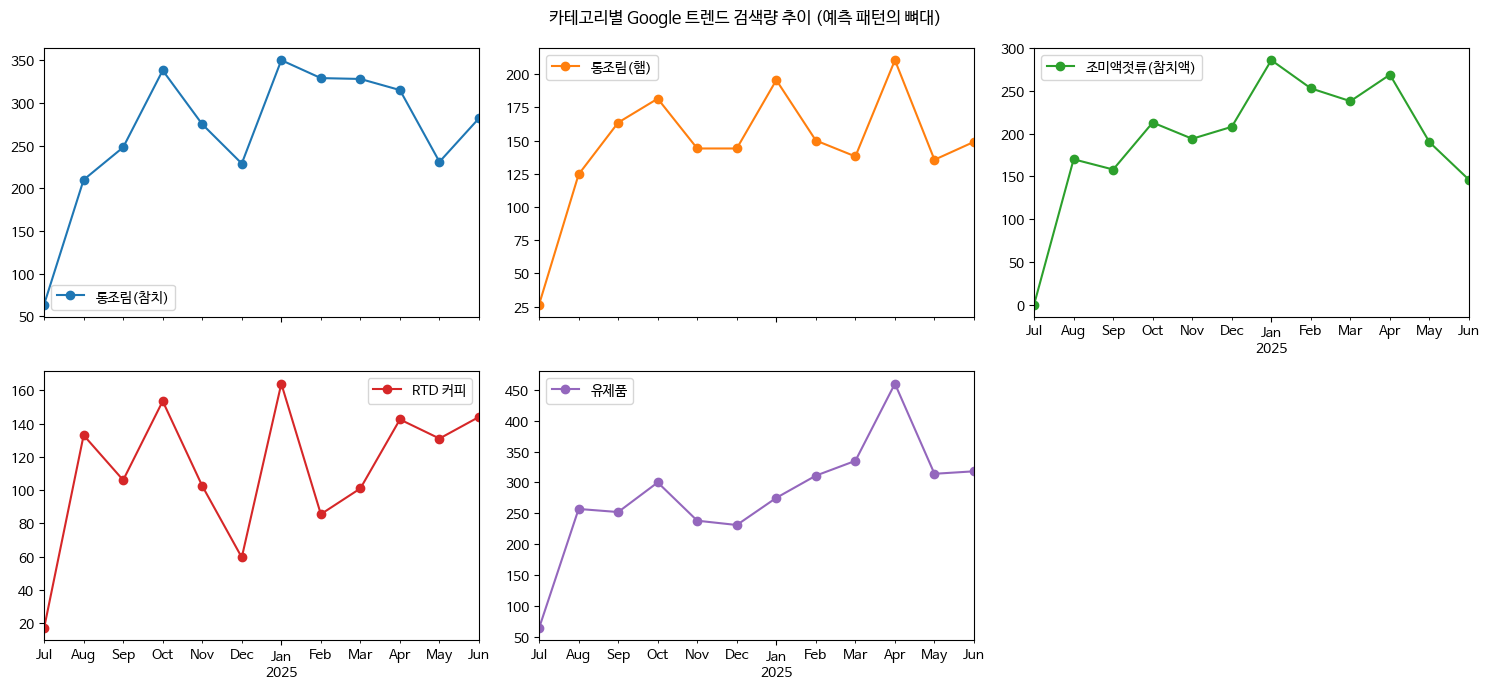

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time
import matplotlib
from IPython.display import display, HTML

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 1단계: 폰트 설치 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
print("🔧 1단계: 한글 폰트 설치 및 캐시 삭제를 시작합니다...")
!apt-get -qq -y install fonts-nanum
!rm -rf {matplotlib.get_cachedir()}/*
print("✅ 폰트 설치가 완료되었습니다.")


# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ ‼️ 중요: 사용자 안내 메시지 ‼️ ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

display(HTML("<h2 style='color:red;'>‼️ 중요: 만약 이 셀을 처음 실행하셨다면, 지금 바로 상단 메뉴에서 [세션] > [세션 다시 시작]을 누른 후, 이 셀을 다시 실행해주세요.</h2>"))
display(HTML("<p>세션을 다시 시작하지 않으면 아래 그래프의 한글이 깨져 보일 수 있습니다.</p>"))


# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 2단계: Google 트렌드 데이터 추출 및 시각화 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
print("\n🔄 2단계: Google 트렌드 데이터 추출 및 그래프 생성을 시작합니다...")

pytrends = TrendReq(hl='ko-KR', tz=540) # 한국 시간 기준

# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 수정된 부분 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# '통조림(참치)'의 검색어를 '참치캔 레시피' -> '참치캔'으로 변경
keywords_by_category = {
    "통조림(참치)": ["참치캔"],
    "통조림(햄)": ["스팸 선물세트", "부대찌개"],
    "조미액젓류(참치액)": ["참치액"],
    "RTD 커피": ["RTD 커피", "편의점 커피"],
    "유제품": ["그릭요거트"]
}
# ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

timeframe = '2024-07-01 2025-06-30'
all_trends_df = pd.DataFrame()

for category, kw_list in keywords_by_category.items():
    print(f"'{category}' 카테고리 처리 중...")
    try:
        pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='KR')
        interest_over_time_df = pytrends.interest_over_time()

        if not interest_over_time_df.empty and 'isPartial' in interest_over_time_df.columns:
            monthly_interest = interest_over_time_df.drop('isPartial', axis=1).mean(axis=1).resample('ME').sum()
            monthly_interest.name = category

            if all_trends_df.empty:
                all_trends_df = pd.DataFrame(monthly_interest)
            else:
                all_trends_df = all_trends_df.join(pd.DataFrame(monthly_interest))
        else:
            print(f"⚠️  경고: '{category}'에 대한 트렌드 데이터를 찾을 수 없습니다. 건너뜁니다.")

    except Exception as e:
        print(f"'{category}' 처리 중 오류 발생: {e}")

    time.sleep(1)

date_index = pd.to_datetime([
    '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
    '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30'
])

if len(all_trends_df) > 12:
    all_trends_df = all_trends_df.iloc[:12]

# 모든 카테고리의 데이터가 정상적으로 수집되었는지 확인 후 인덱스 설정
if not all_trends_df.empty:
    all_trends_df.index = date_index
    print("\n--- [완료] 월별 검색량 데이터(패턴의 '뼈대') ---")
    print(all_trends_df.T.round(1))

    # 시각화
    all_trends_df.plot(kind='line', figsize=(15, 7), subplots=True, layout=(2,3),
                       title="카테고리별 Google 트렌드 검색량 추이 (예측 패턴의 뼈대)", marker='o')
    plt.tight_layout()
    plt.show()
else:
    print("\n데이터를 수집하지 못해 그래프를 생성할 수 없습니다.")

In [ ]:
import pandas as pd
from io import StringIO
import re

print("--- [최종 단계] 데이터 분류, 취합 및 파일 생성 시작 ---")

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼ 1. 최종 LLM 시뮬레이션 결과 (사용자 제공) ▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================
llm_final_results = {
    "조미액젓류(참치액)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 동원참치액 순 500g | 400 | 420 | 500 | 480 | 520 | 490 | 580 | 550 | 540 | 560 | 480 | 450 |
| 동원참치액 순 900g | 550 | 580 | 700 | 670 | 730 | 680 | 810 | 770 | 760 | 780 | 670 | 630 |
| 동원참치액 진 500g | 480 | 500 | 600 | 580 | 630 | 590 | 700 | 660 | 650 | 680 | 580 | 540 |
| 동원참치액 진 900g | 670 | 700 | 850 | 810 | 880 | 830 | 980 | 920 | 910 | 950 | 810 | 760 |
| 프리미엄 동원참치액 500g | 450 | 480 | 550 | 530 | 570 | 550 | 650 | 610 | 600 | 630 | 530 | 500 |
| 프리미엄 동원참치액 900g | 400 | 420 | 500 | 480 | 520 | 490 | 580 | 550 | 540 | 560 | 480 | 450 |
""",
    "통조림(참치)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 동원맛참 고소참기름 135g | 1950 | 2050 | 2150 | 2250 | 3200 | 2100 | 2350 | 2300 | 2290 | 2200 | 2100 | 2150 |
| 동원맛참 고소참기름 90g | 1300 | 1370 | 1430 | 1500 | 2130 | 1400 | 1570 | 1530 | 1520 | 1470 | 1400 | 1430 |
| 동원맛참 매콤참기름 135g | 1600 | 1680 | 1760 | 1840 | 2620 | 1720 | 1920 | 1880 | 1870 | 1800 | 1720 | 1760 |
| 동원맛참 매콤참기름 90g | 1060 | 1120 | 1170 | 1230 | 1750 | 1150 | 1280 | 1250 | 1250 | 1200 | 1150 | 1170 |
""",
    "통조림(햄)": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 리챔 오믈레햄 200g | 1300 | 1450 | 7500 | 1100 | 1000 | 1350 | 5500 | 950 | 1050 | 1200 | 1100 | 1150 |
| 리챔 오믈레햄 340g | 2200 | 2350 | 13500 | 1800 | 1700 | 2250 | 9500 | 1550 | 1750 | 2000 | 1850 | 1950 |
""",
    "RTD 커피": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 소화가 잘되는 우유로 만든 바닐라라떼 250mL | 9800 | 9500 | 7950 | 8500 | 9200 | 6500 | 7200 | 6850 | 7800 | 8200 | 8000 | 8500 |
| 소화가 잘되는 우유로 만든 카페라떼 250mL | 18200 | 17600 | 14750 | 15800 | 17100 | 12100 | 13400 | 12750 | 14500 | 15200 | 14800 | 15800 |
""",
    "유제품": """
| Product_ID | 2024-07 | 2024-08 | 2024-09 | 2024-10 | 2024-11 | 2024-12 | 2025-01 | 2025-02 | 2025-03 | 2025-04 | 2025-05 | 2025-06 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 덴마크 하이그릭요거트 400g | 8500 | 9000 | 8800 | 9500 | 14000 | 8100 | 8600 | 9200 | 9800 | 11500 | 10500 | 11000 |
"""
}

# ==============================================================================
# ▼▼▼▼▼▼▼▼▼▼▼ 2. 데이터 처리 및 최종 파일 생성 (최종 안정화 버전) ▼▼▼▼▼▼▼▼▼▼▼
# ==============================================================================

try:
    # --- Part A: 원본 '정답지(틀)' 파일 로드 ---
    original_submission_df = pd.read_csv('/content/drive/MyDrive/최종 프로젝트/sample_submission.csv')
    id_column_name = original_submission_df.columns[0]
    month_columns = original_submission_df.columns[1:]

    # --- Part B: ID 표준화(Normalization) 함수 정의 ---
    def normalize_id(product_id):
        norm_id = str(product_id).lower()
        norm_id = re.sub(r'[\s_]', '', norm_id)
        norm_id = re.sub(r'(g|ml)', '', norm_id)
        norm_id = re.sub(r'[^a-z0-9가-힣]', '', norm_id)
        return norm_id

    # --- Part C: LLM 결과(내용물)를 표준화된 ID를 가진 데이터베이스로 만들기 ---
    all_predictions = []

    for markdown_table in llm_final_results.values():
        data = StringIO(re.sub(r'\|-+\|', '|---|', markdown_table.strip()))
        pred_df = pd.read_csv(data, sep='|', skipinitialspace=True).iloc[:, 1:-1]
        pred_df.iloc[:, 0] = pred_df.iloc[:, 0].str.strip()
        all_predictions.append(pred_df)

    simulation_df = pd.concat(all_predictions, ignore_index=True)

    # 열 이름을 '2024-07' -> 'months_since_launch_1' 형식으로 변경
    simulation_month_columns = simulation_df.columns[1:]
    column_rename_map = {sim_col: orig_col for sim_col, orig_col in zip(simulation_month_columns, month_columns)}
    simulation_df = simulation_df.rename(columns={simulation_df.columns[0]: id_column_name, **column_rename_map})

    # 시뮬레이션 데이터에 '표준 ID' 열 추가
    simulation_df['normalized_id'] = simulation_df[id_column_name].apply(normalize_id)

    # --- Part D: '정답지'에 '내용물'을 표준화된 ID를 기준으로 채워넣기 ---
    original_submission_df['normalized_id'] = original_submission_df[id_column_name].apply(normalize_id)

    # 병합할 시뮬레이션 데이터 준비 (ID와 월별 데이터만 선택)
    simulation_to_merge = simulation_df[['normalized_id'] + list(month_columns)]

    # '표준 ID'를 기준으로 merge 수행
    output_df = pd.merge(original_submission_df, simulation_to_merge, on='normalized_id', how='left', suffixes=('', '_pred'))

    # 예측된 값으로 기존의 0 값을 업데이트
    for col in month_columns:
        if f'{col}_pred' in output_df.columns:
            output_df[col] = output_df[f'{col}_pred'].combine_first(output_df[col])

    # 원본 파일에 있던 열만 남기기 (중복/임시 열 제거)
    output_df = output_df[original_submission_df.columns.drop('normalized_id')]

    # 데이터 타입을 정수로 변환하고, 누락값은 0으로 채움
    output_df = output_df.fillna(0)
    for col in month_columns:
        output_df[col] = output_df[col].astype(int)

    # 최종 파일 저장
    output_filename = 'final_submission_revised.csv'
    output_df.to_csv(output_filename, index=False)

    print("\n" + "="*50)
    print(f"🎉 최종 대표 표본 시뮬레이션 완료! '{output_filename}' 파일로 저장되었습니다.")
    print("\n--- 취합된 예측 결과 (상위 5개) ---")
    print(output_df.head())

except FileNotFoundError:
    print("오류: 'sample_submission.csv' 파일을 찾을 수 없습니다. 파일을 현재 위치에 업로드해주세요.")
except Exception as e:
    print(f"코드를 실행하는 중 오류가 발생했습니다: {e}")

--- [최종 단계] 데이터 분류, 취합 및 파일 생성 시작 ---

🎉 최종 대표 표본 시뮬레이션 완료! 'final_submission_revised.csv' 파일로 저장되었습니다.

--- 취합된 예측 결과 (상위 5개) ---
       product_name  months_since_launch_1  months_since_launch_2  \
0  덴마크 하이그릭요거트 400g                   8500                   9000   
1   동원맛참 고소참기름 135g                   1950                   2050   
2    동원맛참 고소참기름 90g                   1300                   1370   
3   동원맛참 매콤참기름 135g                   1600                   1680   
4    동원맛참 매콤참기름 90g                   1060                   1120   

   months_since_launch_3  months_since_launch_4  months_since_launch_5  \
0                   8800                   9500                  14000   
1                   2150                   2250                   3200   
2                   1430                   1500                   2130   
3                   1760                   1840                   2620   
4                   1170                   1230                   1750   

   months

In [ ]:
import pandas as pd

print("--- [4단계: 최종 스케일업] ---")

try:
    # 3단계에서 생성된 대표 표본 시뮬레이션 결과 파일 로드
    final_df = pd.read_csv('final_submission_revised.csv')
    id_column_name = final_df.columns[0]
except FileNotFoundError:
    print("오류: 'final_submission_revised.csv' 파일을 찾을 수 없습니다. 3단계 코드를 먼저 실행하여 파일을 생성해주세요.")
    exit()

# 카테고리 분류 함수
def categorize_product(product_id):
        product_id_lower = str(product_id).lower()
        if '요거트' in product_id_lower: return '유제품'
        if '라떼' in product_id_lower or 'coffee' in product_id_lower: return 'RTD 커피'
        if 'tuna_chamchi' in product_id_lower or '맛참' in product_id_lower: return '통조림(참치)'
        if '리챔' in product_id_lower: return '통조림(햄)'
        if 'tuna_sauce' in product_id_lower or '참치액' in product_id_lower: return '조미액젓류(참치액)'
        return '기타'


# 최종 수정된 스케일업 계수 정의
scaling_factors = {
    '통조림(햄)': 2500,
    '통조림(참치)': 2400,
    'RTD 커피': 1200,
    '유제품': 1000,
    '조미액젓류(참치액)': 600,
    '기타': 1 # 분류 안된 제품은 스케일업 안함
}

# 스케일업을 적용할 새로운 데이터프레임 생성
scaled_df = final_df.copy()

# 각 행(제품)을 순회하며 스케일업 계수 적용
for index, row in scaled_df.iterrows():
    product_id = row[id_column_name]
    category = categorize_product(product_id)
    factor = scaling_factors.get(category, 1) # 카테고리에 맞는 계수 가져오기

    # ID열을 제외한 모든 월별 판매량에 스케일업 계수 곱하기
    for col in scaled_df.columns:
        if col != id_column_name:
            scaled_df.loc[index, col] = int(row[col] * factor)

# 최종 결과 저장
scaled_output_filename = 'scaled_final_submission_revised.csv'
scaled_df.to_csv(scaled_output_filename, index=False)

print(f"🎉 스케일업이 완료되었습니다!")
print(f"최종 현실 판매량 예측 결과가 '{scaled_output_filename}' 파일로 저장되었습니다.")
print("\n--- 스케일업된 최종 예측 결과 (상위 5개) ---")
print(scaled_df.head())

--- [4단계: 최종 스케일업] ---
🎉 스케일업이 완료되었습니다!
최종 현실 판매량 예측 결과가 'scaled_final_submission_revised.csv' 파일로 저장되었습니다.

--- 스케일업된 최종 예측 결과 (상위 5개) ---
       product_name  months_since_launch_1  months_since_launch_2  \
0  덴마크 하이그릭요거트 400g                8500000                9000000   
1   동원맛참 고소참기름 135g                4680000                4920000   
2    동원맛참 고소참기름 90g                3120000                3288000   
3   동원맛참 매콤참기름 135g                3840000                4032000   
4    동원맛참 매콤참기름 90g                2544000                2688000   

   months_since_launch_3  months_since_launch_4  months_since_launch_5  \
0                8800000                9500000               14000000   
1                5160000                5400000                7680000   
2                3432000                3600000                5112000   
3                4224000                4416000                6288000   
4                2808000                2952000                4200000   



# 페르소나 / 월별 판매량 분리

In [ ]:
import pandas as pd

# 1. 월별 예상 판매량 데이터를 딕셔너리 형태로 정의합니다.
# pandas DataFrame으로 변환하기 가장 쉬운 구조입니다.
data = {
    'Month': [
        '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
        '2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06'
    ],
    'Yogurt': [
        93000, 100000, 87000, 93000, 77000, 72000,
        86000, 99000, 100000, 91000, 83000, 78000
    ],
    'Latte': [
        68000, 100000, 69000, 50000, 37000, 34000,
        34000, 35000, 44000, 47000, 46000, 48000
    ],
    'Tuna': [
        81000, 100000, 111800, 76000, 57000, 58000,
        89700, 62000, 66000, 63000, 58000, 58000
    ],
    'Seasoning_Sauce': [
        36000, 41000, 70200, 79000, 100000, 50000,
        44200, 39000, 35000, 36000, 31000, 25000
    ],
    'Canned_Ham': [
        94300, 115000, 110500, 66000, 50000, 58650,
        118085, 61000, 51000, 41000, 43000, 41000
    ]
}

# 2. 딕셔너리 데이터를 pandas DataFrame으로 변환합니다.
# DataFrame은 표 형태의 데이터를 다루기에 최적화된 자료구조입니다.
df = pd.DataFrame(data)

# 3. DataFrame을 CSV 파일로 저장합니다.
# index=False 옵션은 DataFrame의 인덱스(0, 1, 2...)가 파일에 저장되지 않도록 합니다.
# encoding='utf-8-sig'는 Excel에서 한글 깨짐 없이 파일을 열 수 있도록 도와줍니다.
file_name = 'monthly_sales_forecast.csv'
df.to_csv(file_name, index=False, encoding='utf-8-sig')

# 4. 파일 저장이 완료되었음을 사용자에게 알려줍니다.
print(f"'{file_name}' 파일이 성공적으로 저장되었습니다.")

'monthly_sales_forecast.csv' 파일이 성공적으로 저장되었습니다.
